In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [26]:
customers_data = pd.read_csv("E:\\Zeotap Assignment\\Customers.csv")
transactions_data = pd.read_csv("E:\\Zeotap Assignment\\Transactions - Transactions.csv")

In [27]:
merged_df = transactions_data.merge(customers_data, on='CustomerID')

In [28]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [29]:
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])

# Find the most recent transaction date
recent_transaction_date = merged_df['TransactionDate'].max()

# Calculate the difference in days and store it in a new column
merged_df['days_since_signup'] = (recent_transaction_date - merged_df['SignupDate']).dt.days

# Display the DataFrame
merged_df.head(10)

#merged_df['TransactionDay'] = merged_df['TransactionDate'].dt.day
#merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.month


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,days_since_signup
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,756
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,115
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,268
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,261
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,1019
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,Anna Ball,South America,2022-05-17,956
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,Jeremy Mclaughlin,South America,2024-09-17,102
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,David Li,North America,2024-01-13,350
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,Miguel Wong,North America,2024-01-30,333
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,Robert Jones,South America,2023-04-19,619


In [ ]:
#we have to aggreagte the Data at customer level.

#customer ID
#Number of products, unique
#most purchased product
#Total Qty
#Total Price
#Region
#Latest Days_since_signup

In [30]:
# Find the most recent transaction date
max_date = merged_df['TransactionDate'].max()

# Aggregate customer-level data
customer_df = merged_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    #avg_spent=('TotalValue', 'mean'),
    transaction_count=('TransactionID', 'count'),
    total_items_pur = ('Quantity', 'sum'),
    #unique_products=('ProductID', lambda x: len(set(x))),  # Unique products count
    #most_frequent_product=('ProductID', lambda x: x.mode()[0] if not x.mode().empty else None),  # Most frequent product
    #last_transaction=('TransactionDate', 'max'),
    Region =('Region', 'first'),
    max_days_since_signup=('days_since_signup', 'max')  # Retain highest days_since_signup
).reset_index()

# Calculate recency (days since last transaction)
#customer_df['recency'] = (max_date - customer_df['last_transaction']).dt.days

# Drop last transaction date column (optional)
#customer_df.drop(columns=['last_transaction'], inplace=True)

customer_df.head(20)

,CustomerID,total_spent,transaction_count,total_items_pur,Region,max_days_since_signup
0,C0001,3354.52,5,12,South America,902
1,C0002,1862.74,4,10,Asia,1049
2,C0003,2725.38,4,14,South America,296
3,C0004,5354.88,8,23,South America,811
4,C0005,2034.24,3,7,Asia,866
5,C0006,4227.57,4,12,South America,356
6,C0007,2579.82,3,8,Asia,924
7,C0008,4271.61,10,20,North America,350
8,C0009,896.50,3,3,Europe,502
9,C0010,1717.55,4,12,Europe,744


In [31]:
data_for_clustering = customer_df.copy()

In [9]:
#Get list of categorical variables
s = (data_for_clustering.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)


Categorical variables in the dataset: ['CustomerID', 'Region']


In [32]:
to_drop = ["CustomerID"]

data_for_clustering = data_for_clustering.drop(to_drop, axis=1)

In [11]:
data_for_clustering

,total_spent,transaction_count,total_items_pur,Region,max_days_since_signup
0,3354.52,5,12,South America,902
1,1862.74,4,10,Asia,1049
2,2725.38,4,14,South America,296
3,5354.88,8,23,South America,811
4,2034.24,3,7,Asia,866
...,...,...,...,...,...
194,4982.88,4,12,Europe,935
195,1928.65,3,9,Europe,648
196,931.83,2,3,Europe,1035
197,1979.28,4,9,Europe,756


In [33]:
data_for_clustering.columns

Index(['total_spent', 'transaction_count', 'total_items_pur', 'Region',
       'max_days_since_signup'],
      dtype='object')

In [34]:
# One-hot encoding
df_encoded = pd.get_dummies(data_for_clustering, columns=['Region'], prefix=['Reg'])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


numeric_columns = ['total_spent',  'transaction_count', 'total_items_pur','max_days_since_signup']  # replace with your actual numeric columns
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

#  data is ready for clustering algorithms like K-means

In [35]:
df_encoded

,total_spent,transaction_count,total_items_pur,max_days_since_signup,Reg_Asia,Reg_Europe,Reg_North America,Reg_South America
0,-0.061701,-0.011458,-0.122033,1.148752,False,False,False,True
1,-0.877744,-0.467494,-0.448000,1.600431,True,False,False,False
2,-0.405857,-0.467494,0.203934,-0.713270,False,False,False,True
3,1.032547,1.356650,1.670787,0.869141,False,False,False,True
4,-0.783929,-0.923530,-0.936951,1.038137,True,False,False,False
...,...,...,...,...,...,...,...,...
194,0.829053,-0.467494,-0.122033,1.250149,False,True,False,False
195,-0.841689,-0.923530,-0.610984,0.368300,False,True,False,False
196,-1.386975,-1.379566,-1.588886,1.557414,False,True,False,False
197,-0.813993,-0.467494,-0.610984,0.700146,False,True,False,False


In [36]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(df_encoded)
PCA_ds = pd.DataFrame(pca.transform(df_encoded), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,199.0,-8.926416e-18,1.655635,-3.240202,-1.145063,-0.175087,0.972562,4.903669
col2,199.0,2.677925e-17,1.006693,-1.651245,-0.851551,-0.094284,0.890700,1.734237
col3,199.0,-1.338962e-17,0.527621,-0.947361,-0.401508,-0.196124,0.597729,1.008376


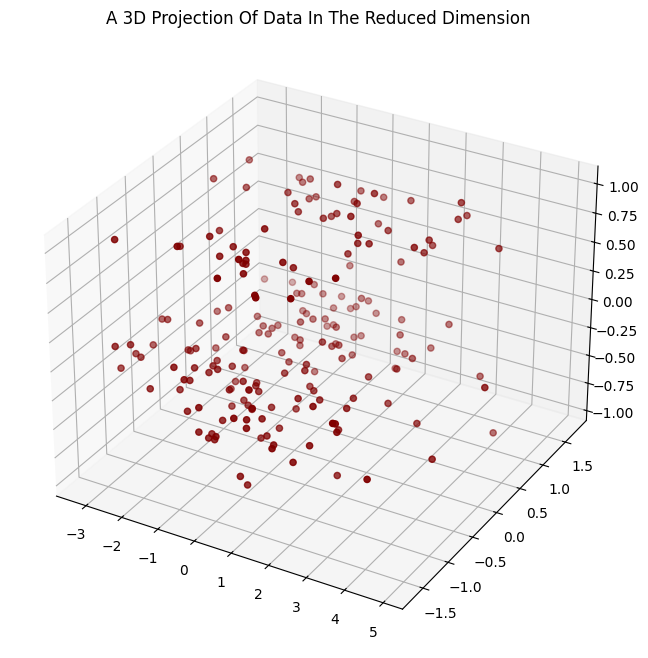

In [37]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

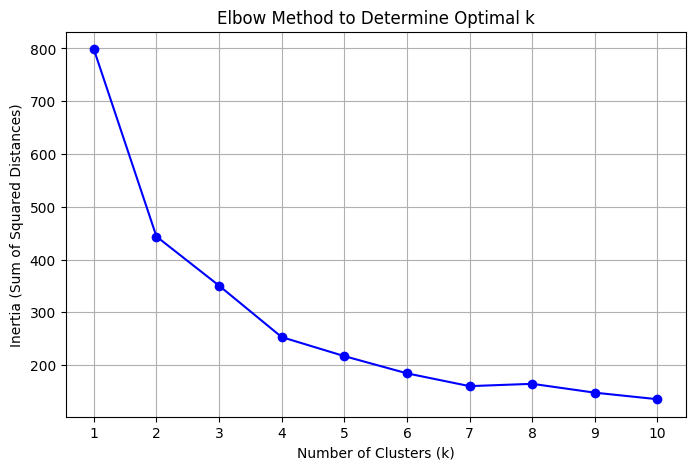

In [38]:

# Define range of clusters
k_values = range(1, 11)
inertia_values = []

# Compute inertia for different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_ds)

    # Predict cluster labels
    labels = kmeans.labels_

    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [39]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
customer_df["Clusters"]= yhat_AC

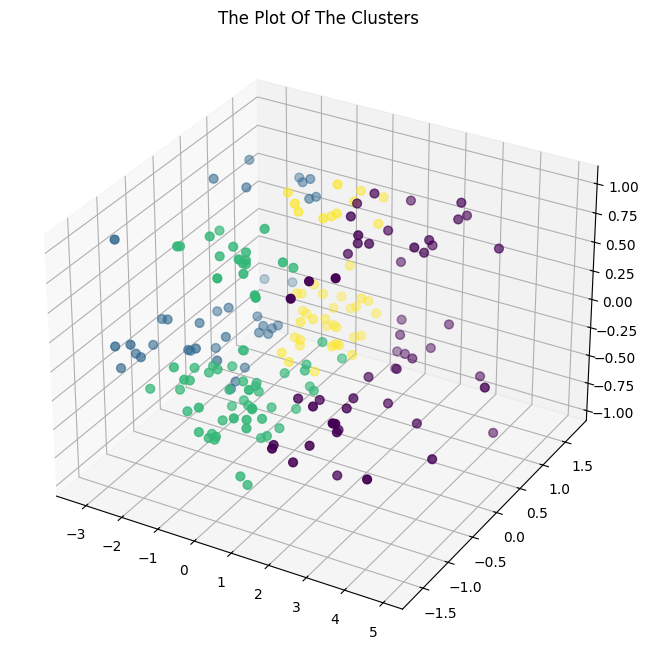

In [40]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
#cmap = cm.get_cmap('viridis')  # You can choose other colormaps like 'plasma', 'coolwarm', etc.
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [20]:
# Assuming 'X_scaled' is your feature data and 'merged_df['Cluster']' contains the cluster labels
dbi_score = davies_bouldin_score(PCA_ds, PCA_ds["Clusters"])

print(f"Davies-Bouldin Index (DBI) Score: {dbi_score}")


Davies-Bouldin Index (DBI) Score: 0.8253966553881009


In [42]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(PCA_ds, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.27252797799920925
